In [1]:
import pandas as pd

import glob

path='c:\\Users\dougw\Desktop\Analise-Polybench-Mali-T628\Logs de Energia'

files = [f for f in glob.glob(path + "**/*.txt", recursive=True)]

for f in files:
    print(f)

c:\Users\dougw\Desktop\Analise-Polybench-Mali-T628\Logs de Energia\2DCONV_GPU_177000000_IdlesFreq_1GHZ_log_energia.txt
c:\Users\dougw\Desktop\Analise-Polybench-Mali-T628\Logs de Energia\2DCONV_GPU_266000000_IdlesFreq_1GHZ_log_energia.txt
c:\Users\dougw\Desktop\Analise-Polybench-Mali-T628\Logs de Energia\2DCONV_GPU_350000000_IdlesFreq_1GHZ_log_energia.txt
c:\Users\dougw\Desktop\Analise-Polybench-Mali-T628\Logs de Energia\2DCONV_GPU_420000000_IdlesFreq_1GHZ_log_energia.txt
c:\Users\dougw\Desktop\Analise-Polybench-Mali-T628\Logs de Energia\2DCONV_GPU_480000000_IdlesFreq_1GHZ_log_energia.txt
c:\Users\dougw\Desktop\Analise-Polybench-Mali-T628\Logs de Energia\2DCONV_GPU_543000000_IdlesFreq_1GHZ_log_energia.txt
c:\Users\dougw\Desktop\Analise-Polybench-Mali-T628\Logs de Energia\2DCONV_GPU_600000000_IdlesFreq_1GHZ_log_energia.txt
c:\Users\dougw\Desktop\Analise-Polybench-Mali-T628\Logs de Energia\2MM_GPU_177000000_IdlesFreq_1GHZ_log_energia.txt
c:\Users\dougw\Desktop\Analise-Polybench-Mali-T628\

In [2]:
def group_results(file,name):
    df_temp = pd.DataFrame()
    dict_temp = {}    

    for line in file:
        if ":" in line:
            key, value = line.split(':')[0], float(line.split(':')[1])
            dict_temp[key] =  float(value)
            #print(key,':',value)
        else: 
            if 'm' in line:
                key = line.split('\t')[0]
                mi = int(line.split('\t')[1].split('m')[0])
                se = float(line.split('\t')[1].split('m')[1].replace('s',''))
                tot = mi*60 + se
                dict_temp[key] =  float(value)
                #print(key,':',tot)
                if "sys" in line:
                    df_temp = df_temp.append(dict_temp, ignore_index=True)
                    dict_temp = dict.fromkeys(dict_temp, 0)
    
    df_temp = df_temp.mean().to_dict()
    
    app = name.split('\\')[-1].split('_')[0]
    dev = name.split('_')[1]
    dev_freq = int(name.split('_')[2])
    
    df_temp['App'] = app
    df_temp['Freq'] = dev_freq
    #df_temp['Dev'] = str(dev)
    
    return df_temp

In [3]:
df = pd.DataFrame()

for path in files:
    log_data=open(path,'r')
    temp_dict = group_results(log_data, path)
    df = df.append(temp_dict, ignore_index=True)
    col = df['Freq']
    df.drop(labels=['Freq'], axis=1,inplace = True)
    df.insert(0, 'Freq', col)
    col = df['App']
    df.drop(labels=['App'], axis=1,inplace = True)
    df.insert(0, 'App', col)
  

In [4]:
df

,App,Freq,A15_Acumulada,A7_Acumulada,GPU_Acumulada,MEM_Acumulada,real,sys,user
0,2DCONV,177000000.0,3.403971,0.413798,0.337780,0.596306,0.596306,0.596306,0.596306
1,2DCONV,266000000.0,3.129412,0.378646,0.292762,0.526093,0.526093,0.526093,0.526093
2,2DCONV,350000000.0,3.040314,0.370649,0.250533,0.501118,0.501118,0.501118,0.501118
3,2DCONV,420000000.0,2.963701,0.361794,0.352595,0.491793,0.491793,0.491793,0.491793
4,2DCONV,480000000.0,3.439572,0.368612,0.466747,0.534291,0.534291,0.534291,0.534291
5,2DCONV,543000000.0,2.970968,0.360697,0.387990,0.493903,0.493903,0.493903,0.493903
6,2DCONV,600000000.0,2.979464,0.360785,0.390061,0.487193,0.487193,0.487193,0.487193
7,2MM,177000000.0,20.157730,6.243570,52.325207,8.938003,8.938003,8.938003,8.938003
8,2MM,266000000.0,13.909800,4.297825,51.544303,6.377143,6.377143,6.377143,6.377143
9,2MM,350000000.0,11.191210,3.383405,51.947573,5.149301,5.149301,5.149301,5.149301


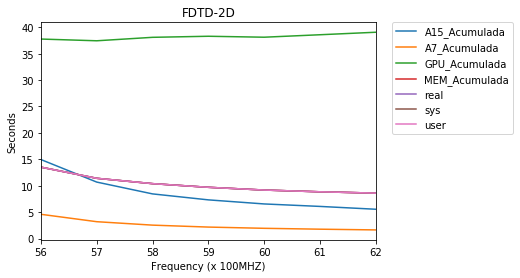

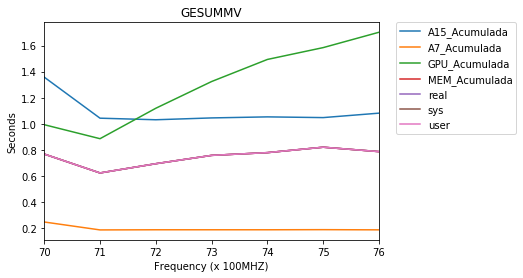

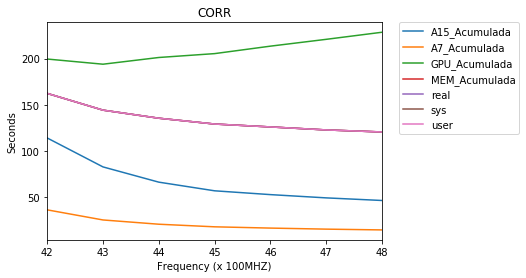

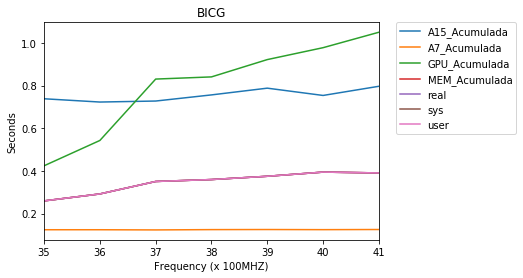

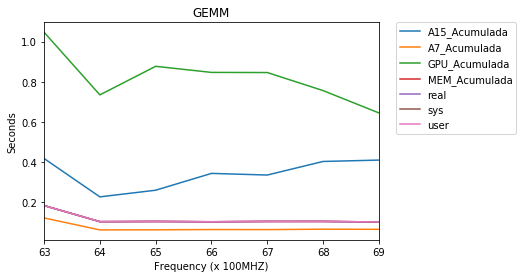

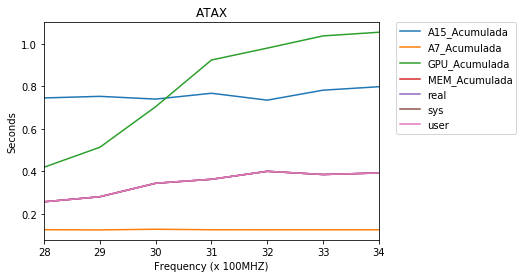

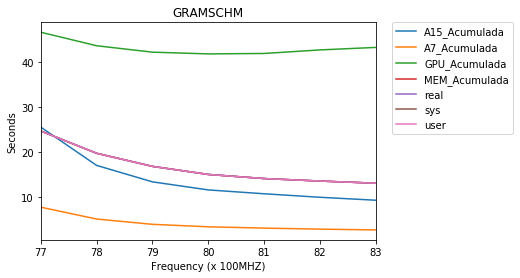

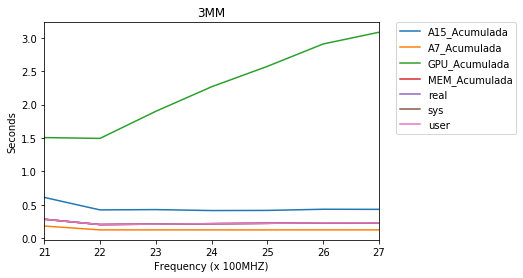

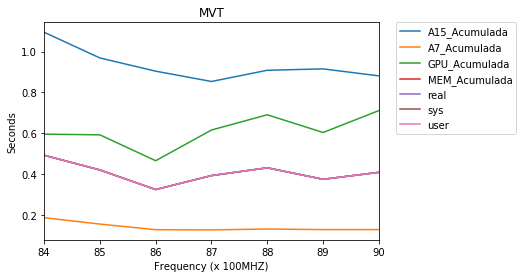

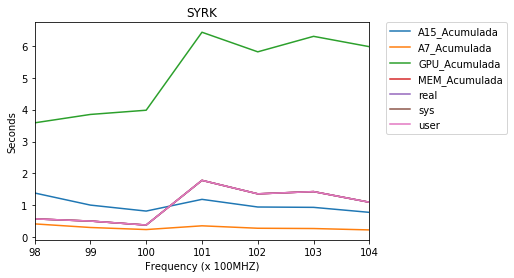

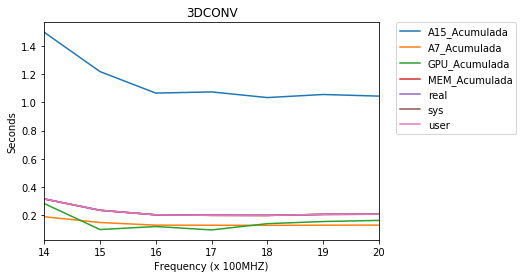

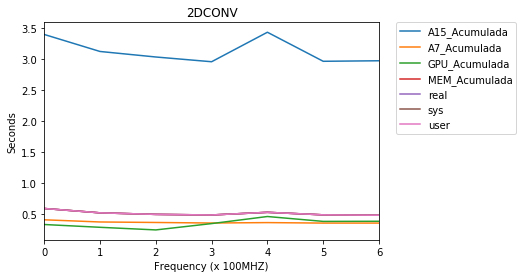

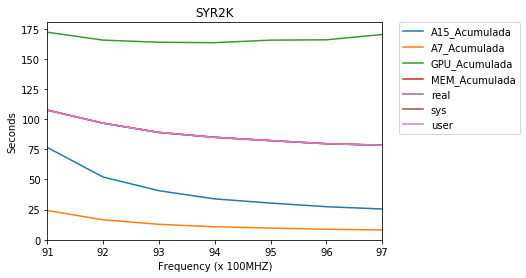

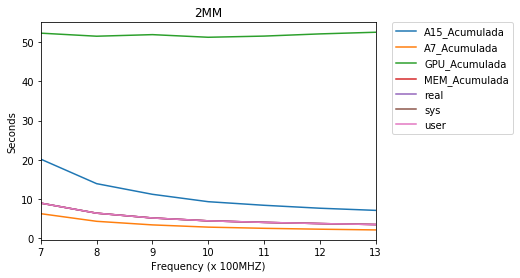

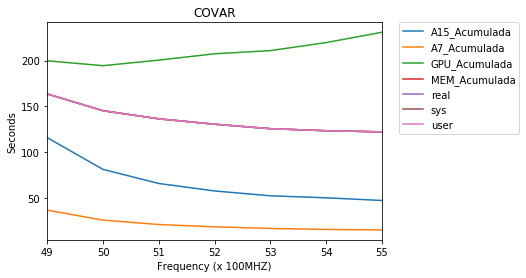

In [10]:
import numpy as np
import matplotlib.pyplot as plt

apps = list(set(df['App']))
dict_plot = {}

for app in apps:
    df_plot = df[df['App'] == app]
    df_plot = df_plot.loc[:, df_plot.columns.difference(['Freq'])] 
    #dict_plot[app] = ggplot(df_plot,aes(x='Freq',y='Total'))+geom_line()
    df_plot.plot()
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title(app)
    plt.xlabel("Frequency (x 100MHZ)")
    plt.ylabel("Seconds")
